# Project: Investigate Noshowappointments Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset contains the appointments from 3 months in 2016. Based on this analysis I will be able to analyse what drives patients to show up for their appointments

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sb
% matplotlib inline

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling

### General Properties
Checking the dataset to get a feel of it, checking for missing values or wrong datatypes

In [2]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [5]:
#Looking for NaNs
df.isnull().sum().sum()

0

### Assessing

after checking the dataset, the following issues need to be addressed:
1. Apointment Date and Scheduled Date columns datatype should be datetime not object
2. Appointment ID and Patient ID should be removed as they won't be benificial in my analysis
3. Hipertension should be renamed to hypertension
4. Hipertension, Diabetes, Alcoholism and Handcap should be groubed under 'Comorbidity' column
5. No-show column should be mapped to a show column for clarity

### Data Cleaning 

#### 1. Apointment Date and Scheduled Date columns datatype should be datetime not object

In [6]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])

df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: datetime64[ns](2), float64(1), int64(8), object(3)
memory usage: 11.8+ MB


#### 2. Appointment ID and Patient ID should be removed as they won't be benificial in my analysis

In [7]:
df.drop(['PatientId','AppointmentID'], axis=1, inplace=True)
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


##### 3. Hipertension should be renamed to hypertension

In [8]:
df.rename(columns={'Hipertension':'Hypertension'}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hypertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: datetime64[ns](2), int64(7), object(3)
memory usage: 10.1+ MB


#### 4. Hypertension, Diabetes, Alcoholism and Handcap should be groubed under 'Comorbidity' column

In [9]:
df['Comorbidities'] = df['Hypertension'] + df['Diabetes'] + df['Alcoholism'] + df['Handcap']

df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Comorbidities
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,1
1,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,2






#### 5. No-show column should be mapped to a show column for clarity

In [10]:
di = {'Yes':0, 'No':1}
df['show'] = df['No-show'].map(di)
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Comorbidities,show
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,1,1
1,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,1
2,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,1
3,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,1
4,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,2,1


<a id='eda'></a>
## Exploratory Data Analysis

I will be exploring each variable on its own to get a feel of the Dataset, and the destribution of each variable. For binary variables I will be looking at Success and Failure Propabilities

> ### Univariate Explorations

**a. Patient's Age Distribution**

In [11]:
df['Age'].describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

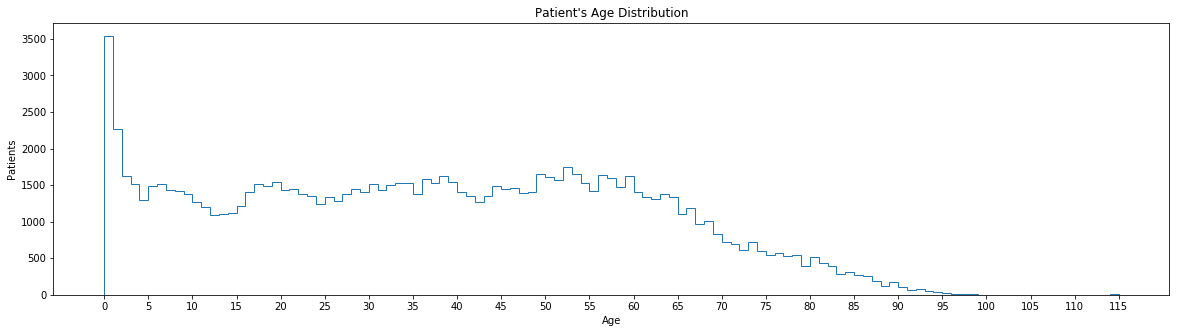

In [14]:
plt.figure(figsize=(20,5));
plt.hist(df['Age'],histtype='step',bins=np.arange(0,115+1,1));
xticks = np.arange(0,115+5,5)
plt.xticks(xticks);
plt.ylabel('Patients');
plt.xlabel('Age');
plt.title("Patient's Age Distribution");

- Most of the patients are in the 0 - 5 years category, some peaks appear around 15 - 20, 35 - 40 and 50 - 55 years old
- There's a value of -1 in the Age variable which is probably a data entering error

In [18]:
df = df.query('Age != -1')
df['Age'].describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

**b. Patients' Gender Distribution**

In [15]:
df['Gender'].value_counts() / df['Gender'].count()

F    0.649977
M    0.350023
Name: Gender, dtype: float64

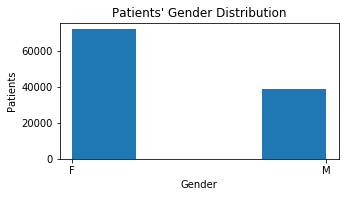

In [16]:
plt.figure(figsize=(5,2.5));
plt.hist(df['Gender'],bins=[0,.25,.5,.75,1]);
xticks = [0,1]
plt.xticks(xticks);
plt.xlabel('Gender')
plt.ylabel('Patients');
plt.title("Patients' Gender Distribution");

65% of the patients were females, while 35% of the patients were Males

**c. Patients who received SMSs**

In [19]:
df['SMS_received'].mean(), 1 - df['SMS_received'].mean() 

(0.32102853627200839, 0.67897146372799155)

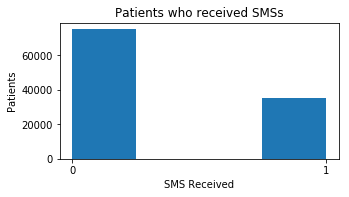

In [20]:
plt.figure(figsize=(5,2.5));
plt.hist(df['SMS_received'],bins=[0,.25,.5,.75,1]);
xticks = [0,1]
plt.xticks(xticks);
plt.xlabel('SMS Received')
plt.ylabel('Patients');
plt.title("Patients who received SMSs");

Only 32% of the patients received an SMS

**d. Patients who have Scholarships**

In [19]:
df['Scholarship'].mean(), 1 - df['Scholarship'].mean() 

(0.098265582165443732, 0.90173441783455632)

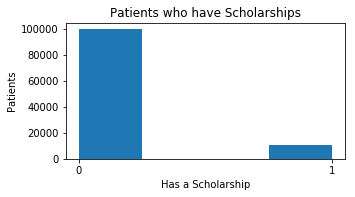

In [20]:
plt.figure(figsize=(5,2.5));
plt.hist(df['Scholarship'],bins=[0,.25,.5,.75,1]);
xticks = [0,1]
plt.xticks(xticks);
plt.xlabel('Has a Scholarship')
plt.ylabel('Patients');
plt.title("Patients who have Scholarships");

1% of the patients had scholarships

**e. Patients who have Comorbidities**

In [21]:
df['Comorbidities'].describe()

count    110527.000000
mean          0.321758
std           0.631381
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           5.000000
Name: Comorbidities, dtype: float64

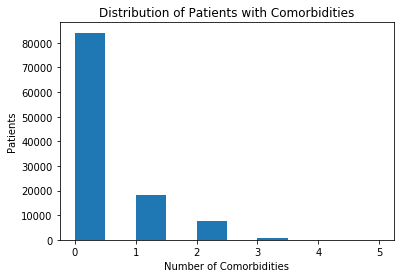

In [22]:
plt.hist(df['Comorbidities'])
plt.xticks(np.arange(0,6,1)) 
plt.xlabel('Number of Comorbidities')
plt.ylabel('Patients');
plt.title("Distribution of Patients with Comorbidities");

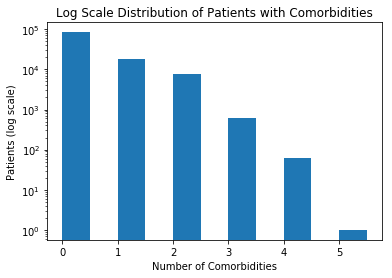

In [23]:
plt.hist(df['Comorbidities'], log=True, bins = np.arange(0,6,.5));
plt.xlabel('Number of Comorbidities')
plt.ylabel('Patients (log scale)');
plt.title("Log Scale Distribution of Patients with Comorbidities");

As the number of comorbidities increased, the number of patients exponentially decreased

> ###  Bivariate Explorations

In [24]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Comorbidities,show
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,1,1
1,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,1
2,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,1
3,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,1
4,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,2,1


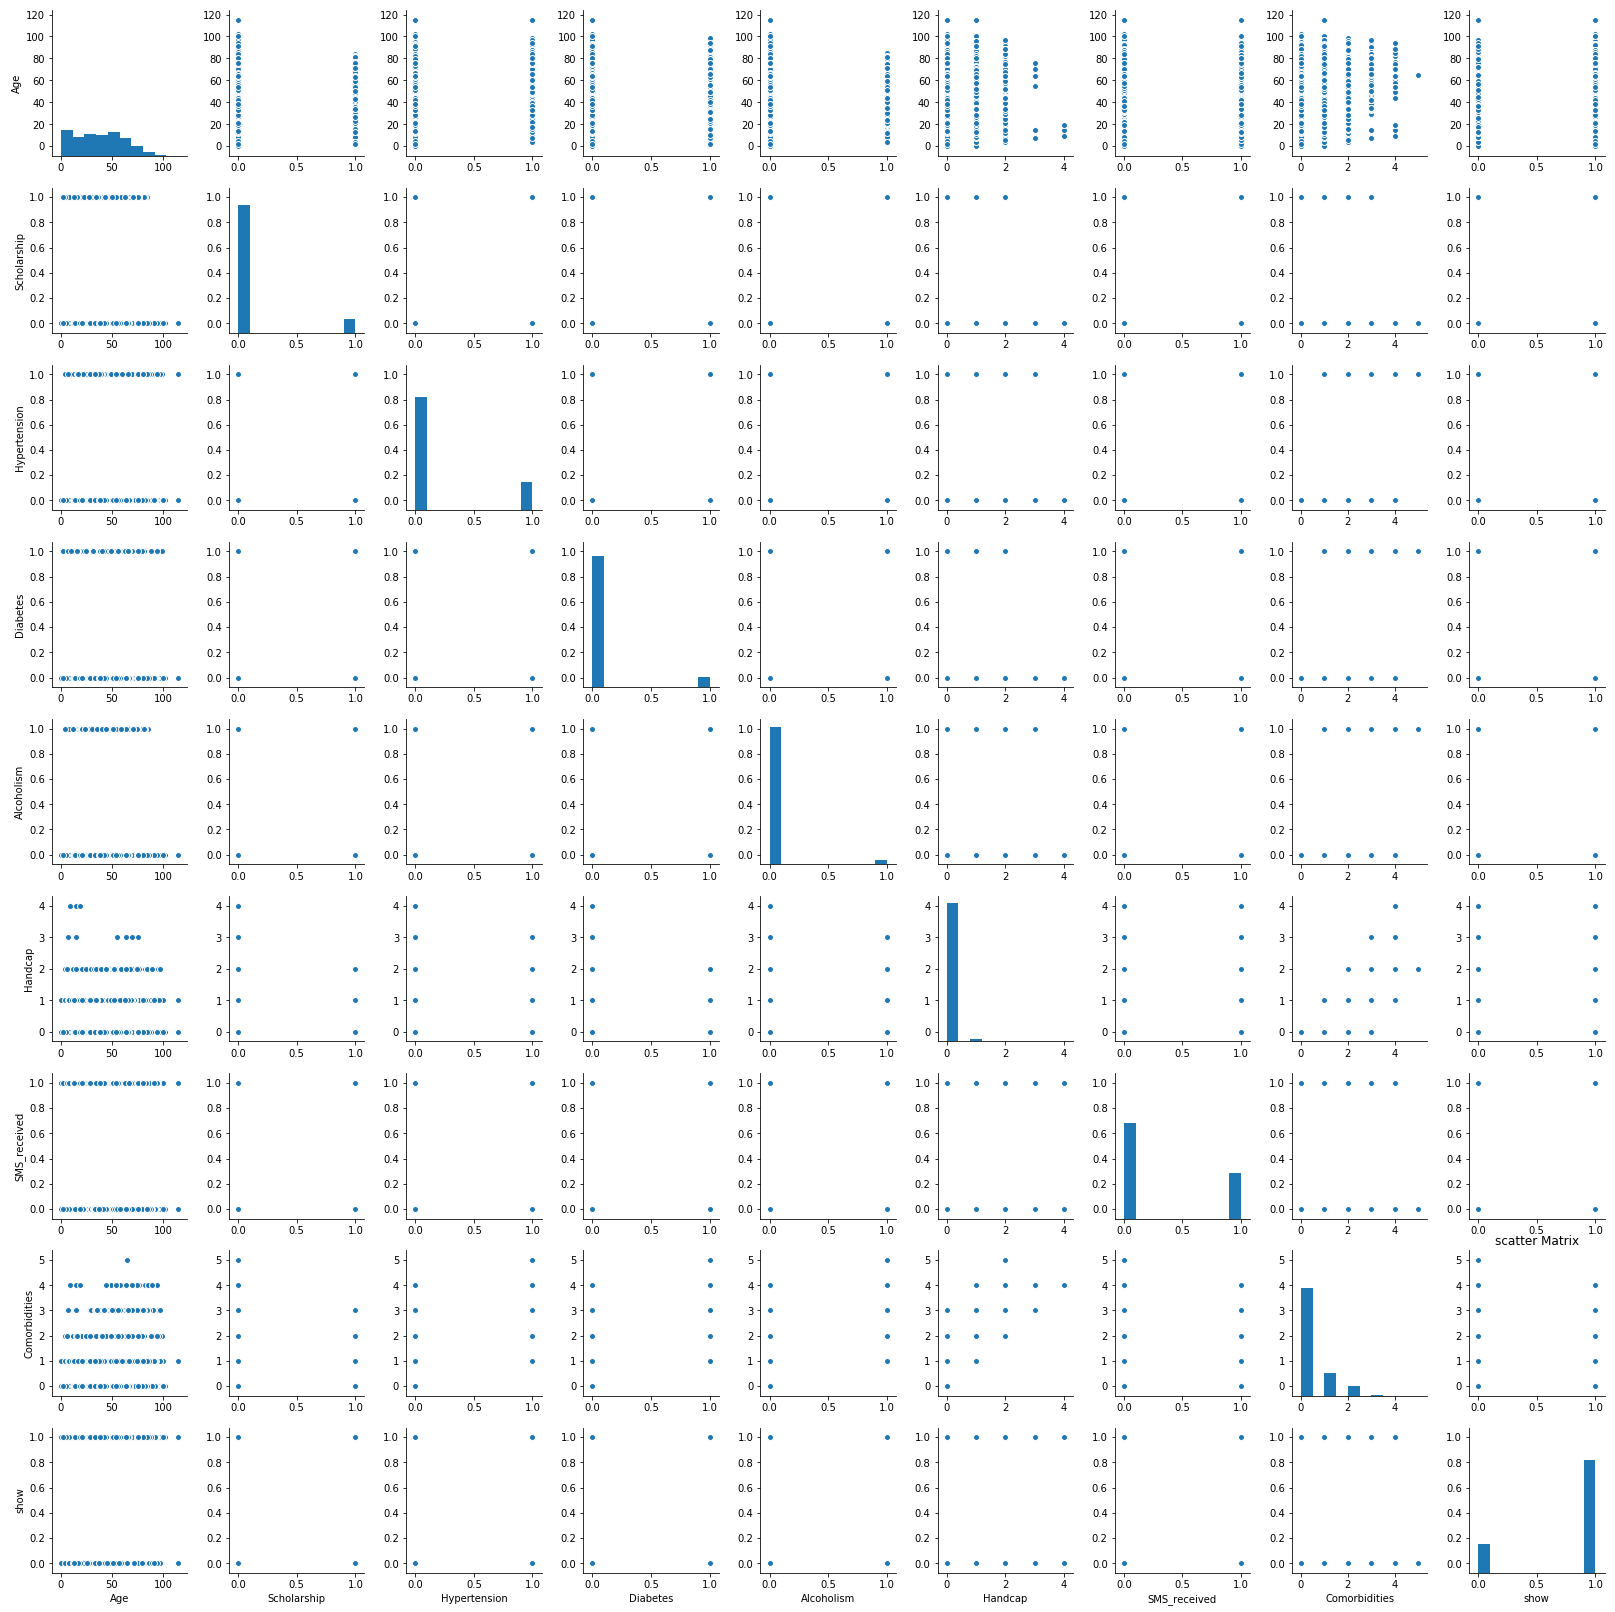

In [22]:
sb.pairplot(df)
plt.title('scatter Matrix');

Text(0.5,1,'Correlation Heatmap')

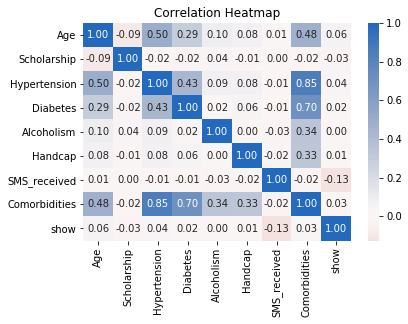

In [23]:
sb.heatmap(df.corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0)
plt.title('Correlation Heatmap')

From the heatmap of correlations, it suggests:
* Hypertension is positively correlated with Age
* Show up rates are negatively correlated with SMS recieved

> The dependent variable that I will be looking at is number of patients who show up to their appointments, and the independent variables are: Age - Gender - Comorbidities - SMS Recieved and Scholarship

#### 1. Does SMS decreaase Noshow rate?

Starting by examining the relationship between the SMS and noshow rate using a scatter plot

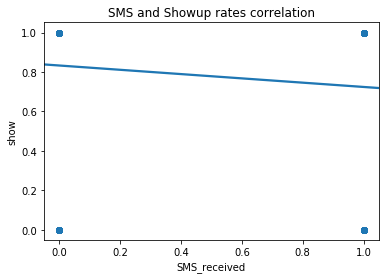

In [30]:
sb.regplot(data = df, x = 'SMS_received', y = 'show')
plt.title('SMS and Showup rates correlation');

As both X and Y are binary, the scatter plot itself wasn't very helpful. However, Unlike what I expected, the correlation coefficient line suggests a negative relationship between receiving an SMS and showing up for the aapointment. To further explore this, I will calculate the difference in means for patients who recieved an SMS and those who didn't

In [31]:
P1 = df.query("SMS_received == 0")['show'].mean()
P1

0.8329646607323703

In [32]:
P2 = df.query("SMS_received == 1")['show'].mean()
P2

0.72425455160363006

In [33]:
P2 - P1

-0.10871010912874024

**Show-up rate decreased by about 11% when patients recieved and SMS prior to their appointments**

#### 2. How existing comorbidities might have an effect on showing up for appointments? And what  comorbidities affect it the most ?

I will try to answer this by a scatter plot with the number of comorbidities and showups. Again, as show-up is a binary variable, a scatter plot won't be very helpful. 

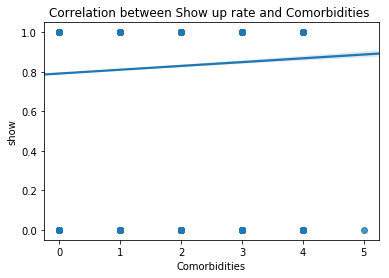

In [34]:
sb.regplot(data = df, x = 'Comorbidities', y = 'show')
plt.title('Correlation between Show up rate and Comorbidities ');

From the coefficient correlation line, it suggests that there's a positive relationship between number of comorbidites and showing up. This outocme makes sense, as a patient with many comorbidities will more likely be commited to showing up for his medical appointment. To further explore this, I will calculate both means and mean difference, as well as mean showups for each different comorbidity

In [35]:
counts = df.groupby(['Comorbidities']).sum()['show']
counts

Comorbidities
0    66511
1    14781
2     6346
3      518
4       51
5        0
Name: show, dtype: int64

In [36]:
totals = df.groupby(['Comorbidities']).count()['show']
totals

Comorbidities
0    84114
1    18014
2     7710
3      624
4       63
5        1
Name: show, dtype: int64

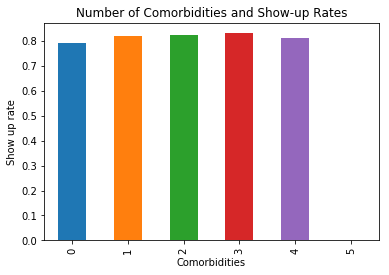

In [37]:
Proportion = counts / totals
Proportion.plot(kind='bar');
plt.title('Number of Comorbidities and Show-up Rates')
plt.ylabel('Show up rate')
plt.xticks(rotation=90);

In [38]:
P1 = df.query('Comorbidities == 0')['show'].mean()
P2 = df.query('Comorbidities != 0')['show'].mean()
P2 - P1

0.030720304869129134

From the above, patients with 1 or more comorbidites are 3% more likely to showup for their appoiontments

Now, I will calcualte the showup mean for each different comorbidities

In [39]:
comorbidities = ['Hypertension', 'Diabetes', 'Alcoholism', 'Handcap']
dftemp = pd.DataFrame(comorbidities, columns = ['comorbidities'])
means = []

means.append(df.query('Hypertension == 1')['show'].mean())
means.append(df.query('Diabetes == 1')['show'].mean())
means.append(df.query('Alcoholism == 1')['show'].mean())
means.append(df.query('Handcap == 1')['show'].mean())

dftemp['means'] = means

Text(0.5,1,'Correlation between different comorbidities and show-up rates')

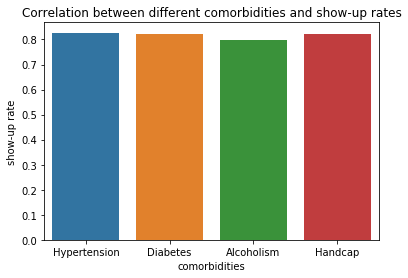

In [46]:
sb.barplot(data=dftemp, x='comorbidities', y='means')
plt.ylabel('show-up rate')
plt.title('Correlation between different comorbidities and show-up rates')

In [41]:
dftemp.sort_values(by=['means'],  ascending=False)

,comorbidities,means
0,Hypertension,0.826980
3,Handcap,0.820764
1,Diabetes,0.819967
2,Alcoholism,0.798512


From the above, patients with **Hypertension** are the most likely to showup while patient with **alcoholism** are the least likely to showup. It's important to note that the difference is in propabilities is less than 3%

#### 3. Is having a scholarship correlated with showing up for appointments?

In [47]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Comorbidities,show
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,1,1
1,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,1
2,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,1
3,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,1
4,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,2,1


In [48]:
p1 = df.query('Scholarship == 1')['show'].mean()

In [49]:
p2 = df.query('Scholarship == 0')['show'].mean()

In [50]:
p2 - p1

0.039289495696782528

**Show-up rate decreased by about 4% in patients who have scholarships**

<a id='conclusions'></a>
## Conclusions

* From initial explorations, it looks like there might be some correlations that require deeper dives and inferential statistical analyses to get a better idea on the population

* It looks like having one or more comorbidites is associated with higher showup rates. Patients with hypertension have higher showup rates while patients with alcoholism have the lowest showup rates

* Show-up rate decreased by about 11% when patients recieved and SMS prior to their appointments

* Show-up rate decreased by about 4% in patients who have scholarships

> **Limitations:**
- Some values don't make sense in practical like having -1 for Age, which affects the quality of the analysis 
- It's not sufficient to decide on existing correlations from just scatterplots, further hypothesis testing will be needed


In [51]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0